In [133]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# os.chdir("Desktop")

In [135]:
df= pd.read_csv("dc_airbnb.csv")

In [136]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [137]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'latitude', 'longitude', 'city', 'zipcode',
       'state'],
      dtype='object')

In [138]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [139]:
df.isnull().sum()

host_response_rate       434
host_acceptance_rate     614
host_listings_count        0
accommodates               0
room_type                  0
bedrooms                  21
bathrooms                 27
beds                      11
price                      0
cleaning_fee            1388
security_deposit        2297
minimum_nights             0
maximum_nights             0
number_of_reviews          0
latitude                   0
longitude                  0
city                       0
zipcode                    9
state                      0
dtype: int64

In [141]:
def median_calc(col):
    df1= pd.read_csv("dc_airbnb.csv")
    df1[col].fillna(0)
    df1[col]= df1[col].apply(lambda x:str(x))
    df1[col]= df1[col].apply(lambda x:x.replace("%",""))
    df1[col]= df1[col].apply(lambda x:"0."+x if float(x)>0 else 0)
    df1[col]= df1[col].astype(float)
    mean = df1[col].mean()
    median= df1[col].median()
    df= pd.read_csv("dc_airbnb.csv")
    df[col]= df[col].apply(lambda x:str(x))
    df[col]= df[col].apply(lambda x:x.replace("%",""))
    df[col]= df[col].apply(lambda x:"0."+x if float(x)>0 else 0)
    df[col]= df[col].astype(float)
    df[col].fillna(median, inplace=True)
    return df[col]

In [142]:
df.host_acceptance_rate= median_calc("host_acceptance_rate")
df.host_response_rate= median_calc("host_response_rate")

In [143]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,0.92,0.91,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,0.90,0.10,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,0.90,0.10,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,0.10,0.00,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,0.92,0.67,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [144]:
#Cleaning fee column
def median_cleaning_fee(col):
    df1= pd.read_csv("dc_airbnb.csv")
    df1[col].fillna(0)
    df1[col]= df1[col].apply(lambda x:str(x))
    df1[col]= df1[col].apply(lambda x:x.replace("$",""))
    df1[col]= df1[col].astype(float)
    median= df1[col].median()
    df= pd.read_csv("dc_airbnb.csv")
    df[col]= df[col].apply(lambda x:str(x))
    df[col]= df[col].apply(lambda x:x.replace("$",""))
    df[col]= df[col].astype(float)
    df[col].fillna(median, inplace=True)
    return df[col]

In [145]:
df.cleaning_fee= median_cleaning_fee("cleaning_fee")

In [146]:
def price_security(col):
    df[col]= df[col].apply(lambda x:str(x))
    df[col]= df[col].apply(lambda x:x.replace("$",""))
    df[col]= df[col].apply(lambda x:x.replace(",","")).astype(float)
    df[col].fillna(df[col].median(),inplace=True)
    return df[col]

In [147]:
df.security_deposit= price_security("security_deposit")
df.price= price_security("price")

In [148]:
df.isnull().sum()

host_response_rate       0
host_acceptance_rate     0
host_listings_count      0
accommodates             0
room_type                0
bedrooms                21
bathrooms               27
beds                    11
price                    0
cleaning_fee             0
security_deposit         0
minimum_nights           0
maximum_nights           0
number_of_reviews        0
latitude                 0
longitude                0
city                     0
zipcode                  9
state                    0
dtype: int64

In [149]:
cols= ["bedrooms","bathrooms","beds"]
for x in cols:
    df[x].fillna(df[x].median(),inplace=True)    

In [150]:
df.isnull().sum()

host_response_rate      0
host_acceptance_rate    0
host_listings_count     0
accommodates            0
room_type               0
bedrooms                0
bathrooms               0
beds                    0
price                   0
cleaning_fee            0
security_deposit        0
minimum_nights          0
maximum_nights          0
number_of_reviews       0
latitude                0
longitude               0
city                    0
zipcode                 9
state                   0
dtype: int64

In [151]:
#Lets do some basic EDA

In [152]:
import seaborn as sns

In [153]:
corr = df.corr()

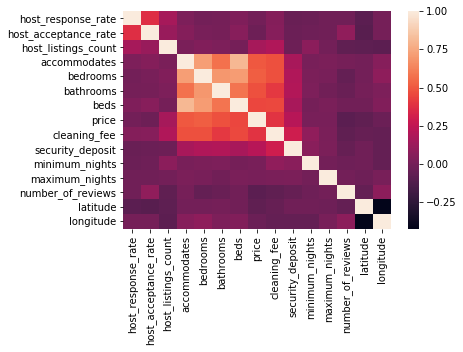

In [154]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [155]:
#high correlation between bedrooms and accomodates
#high correlation between beds and accomodates
#The only one worth excluding is beds- seems to be highly correlated with accomodates

In [156]:
df.drop(["beds"],1,inplace=True)

In [157]:
df.price.max()- df.price.min()

2812.0

In [158]:
#There seems to be a large range of prices for the rooms

In [159]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bedrooms,bathrooms,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3723.000000
mean,0.360145,0.362624,13.517325,3.195004,1.208971,1.254499,149.165995,56.093473,231.706688,2.250067,5.803069e+05,15.306742,38.913967,-77.023294
std,0.368351,0.366788,64.534408,2.012216,0.837626,0.583816,140.110699,36.476831,170.889970,3.622879,3.519552e+07,29.645586,0.021647,0.026951
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,10.000000,5.000000,95.000000,1.000000,1.000000e+00,0.000000,38.825061,-77.110525
25%,0.100000,0.100000,1.000000,2.000000,1.000000,1.000000,85.000000,40.000000,200.000000,1.000000,1.200000e+02,1.000000,38.901789,-77.039859
50%,0.100000,0.100000,1.000000,2.000000,1.000000,1.000000,115.000000,50.000000,200.000000,2.000000,1.125000e+03,4.000000,38.913375,-77.026410
75%,0.800000,0.760000,3.000000,4.000000,1.000000,1.000000,165.000000,55.000000,200.000000,3.000000,1.125000e+03,16.000000,38.926509,-77.002798
max,0.990000,0.990000,480.000000,16.000000,10.000000,8.000000,2822.000000,400.000000,3000.000000,180.000000,2.147484e+09,362.000000,38.996382,-76.913137


In [160]:
#Overall seems to be a right skewed distribution with several values having high means
#This is possibly driven by the presence of outliers

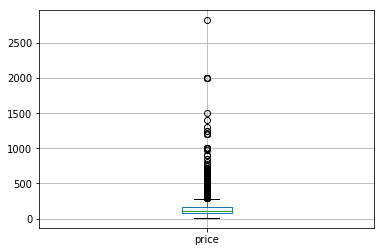

In [161]:
df.boxplot(column=['price'])

In [162]:
#It looks like the price data is heavily skewed towards the right, with several outliers

In [163]:
Q1 = df['price'].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR= Q3-Q1

In [164]:
outliers= df.loc[df["price"]>(Q3+(1.5*IQR))]

In [165]:
outliers.shape[0]/df.shape[0]*100

8.29975825946817

In [166]:
#8% of the target data are outliers- this is a high number so we cannot remove them

In [167]:
df.drop(["latitude","longitude"],1,inplace=True)

In [168]:
df.room_type.value_counts()

Entire home/apt    2419
Private room       1202
Shared room         102
Name: room_type, dtype: int64

In [169]:
X= df.drop(["price"],1)

In [170]:
X= pd.get_dummies(X)

In [171]:
y= df["price"]

In [172]:
from sklearn.model_selection import train_test_split as tts

In [173]:
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.3,random_state= 42)

In [174]:
X_train.shape

(2606, 73)

In [175]:
X_test.shape

(1117, 73)

In [176]:
y_train.shape

(2606,)

In [177]:
y_test.shape

(1117,)

In [178]:
from sklearn.tree import DecisionTreeRegressor

In [179]:
dtr= DecisionTreeRegressor()

In [180]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [181]:
pred= dtr.predict(X_test)

In [182]:
from sklearn.metrics import r2_score

In [183]:
r2_score(y_test,pred)

-0.054985956010903614

In [184]:
from sklearn.ensemble import RandomForestRegressor
seed = 42
import matplotlib.pyplot as plt
rf = RandomForestRegressor(n_estimators=3000,
                           min_samples_leaf=0.08,
                          random_state = seed)

In [185]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.08, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [186]:
y_pred= rf.predict(X_test)

In [187]:
r2_score(y_test,y_pred)

0.27586858372940604

In [190]:
# Lets determine which features are important
importances_rf = pd.Series(rf.feature_importances_,
                          index = X.columns)
sorted_importances = importances_rf.sort_values(ascending=False)
sorted_importances.head(10)

bedrooms                     0.876450
room_type_Entire home/apt    0.072474
accommodates                 0.029968
number_of_reviews            0.009869
cleaning_fee                 0.005064
host_listings_count          0.005005
host_acceptance_rate         0.000587
bathrooms                    0.000290
room_type_Private room       0.000202
minimum_nights               0.000072
dtype: float64

In [191]:
from xgboost import XGBRegressor

In [192]:
xgb= XGBRegressor()

In [193]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [194]:
xgb_pred= xgb.predict(X_test)

In [195]:
r2_score(y_test,xgb_pred)

0.4133751144018568

In [196]:
#Lets try knn to see if we get better accuracies this way
from sklearn.neighbors import KNeighborsRegressor

In [197]:
knn= KNeighborsRegressor(n_neighbors=5)

In [198]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [199]:
y_pred= knn.predict(X_test)

In [200]:
r2_score(y_test,y_pred)

0.3749629028955974

In [201]:
#Cross validation
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsRegressor(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print (np.mean(cv_scores))

[0.12254583 0.35578462 0.10398161 0.26988603 0.31362066]
0.23316375032688103


In [202]:
from sklearn.svm import SVR

In [203]:
svr= SVR()

In [204]:
svr.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
y_pred= svr.predict(X_test)

In [209]:
r2_score(y_test,y_pred)

-0.030030750512602733

In [ ]:
#Ultimately this model suffers from high bias, which is why I used XGBoost - which gave the highest accuracy
#Due to sparsity in data the model accuracy is still very low even after a boosting was applied